## Statistics Lab

In [1]:
import pandas as pd # to see the data
import numpy as np # to make the calclation 
import matplotlib.pyplot as plt # to make the vasulatiation 
import seaborn as sns # make plt very butifaul like make up
import scipy.stats as stats # for statistic 

sns.set(font_scale=1.5)

### Central Limit Theorem

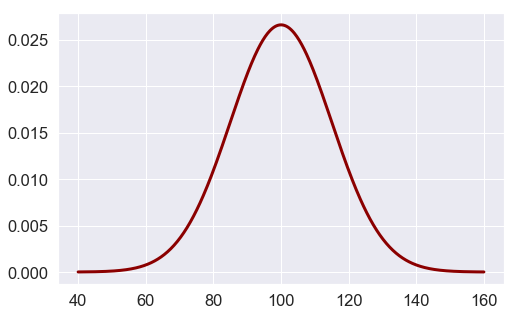

In [2]:
# Generate points on the x axis:
xpoints = np.linspace(40, 160, 500)

# Use stats.norm.pdf to get values on the probability density function for the Normal distribution
ypoints = stats.norm.pdf(xpoints, 100, 15)

# initialize a matplotlib "figure":
fig, ax = plt.subplots(figsize=(8,5))

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
plt.show()

In [3]:
data = pd.read_csv('bikeshare.csv')

In [4]:
data.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


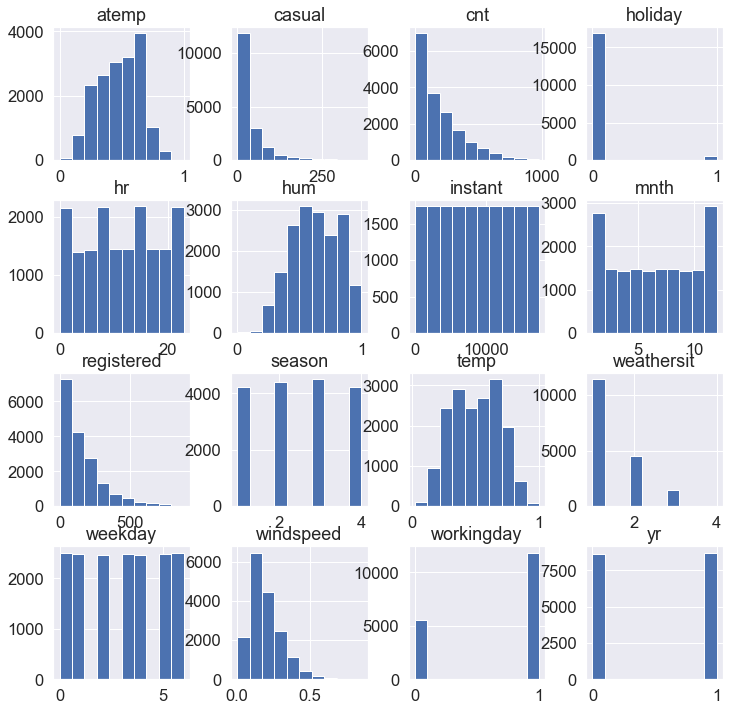

In [6]:
data.hist(figsize=(12,12));

In [7]:
def dist_plotter(sample,bins=50,kde=False):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.distplot(sample, bins=bins, kde=kde)
    plt.show()

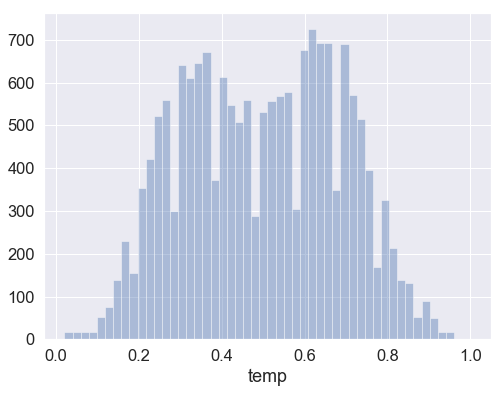

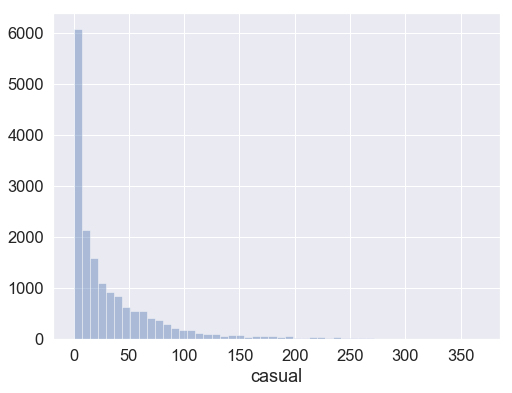

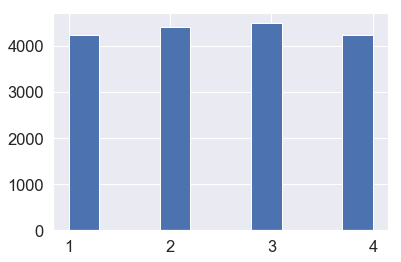

In [8]:
dist_plotter(data.temp)
dist_plotter(data.casual)
data.season.hist();

In [9]:
# Lets change the k value from 10000 to 100000 and check the distribution
n = 30
k = 10000
#def dist_plotter(sample,bins=50,kde=True):

means = dist_plotter(data.temp,n=n,k=k)
dist_plotter(means)

TypeError: dist_plotter() got an unexpected keyword argument 'n'

In [ ]:
n = 30
k = 100000
means = sampler(data.temp,n=n,k=k)
dist_plotter(means)

### Confidence Interval

In [ ]:
single = np.array([24, 26, 35, 32, 38, 35, 31, 43, 40, 42, 39, 48, 37, 27, 33, 33, 34,
                   37, 33, 26, 30, 30, 30, 31, 33, 35, 43, 30, 35, 26, 23, 27, 54, 35,
                   29, 28, 37, 33, 34, 32, 29, 43, 29, 36, 36, 34, 39, 33, 30, 32, 23,
                   30, 31, 38, 35, 22, 59, 20, 45, 33, 35, 33, 23, 58, 33, 30, 38, 28,
                   50, 31, 38, 42, 41, 33, 29, 29, 31, 30, 28, 27, 29, 38, 36, 56, 36,
                   31, 30, 29, 25, 41, 47, 34, 38, 50, 23, 28, 35, 32, 36, 28, 39, 33,
                   25, 36, 27, 30, 29, 42, 43, 20, 26, 53, 41, 27, 31, 33, 38, 37, 31,
                   28, 25, 47, 38, 41, 26, 26, 25, 32, 32, 23, 31, 51, 49, 32, 48, 44,
                   30, 31, 34, 37, 31, 32, 24, 38, 38, 39, 29, 25, 29, 31, 24, 35, 28,
                   24, 24, 35, 36, 21, 56, 54, 28, 32, 27, 30, 31, 31, 27, 32, 30, 29,
                   27, 26, 36, 27, 32, 32, 38, 41, 33, 33, 26, 29, 27, 42, 35, 32, 35,
                   43, 32, 22, 32, 37, 30, 39, 28, 33, 25, 34, 39, 31])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(single, bins=40, kde=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(np.log(single), bins=40, kde=False)
plt.show()

#### Calculate the mean and the standard deviation of the data. What do these statistics tell us specifically?

In [ ]:
print(np.mean(single))
print(np.std(single))

This tells us that the mean age of our sample is 33.55 years.
The standard deviation, which is a measure of the average spread in the observed age data compared to the mean age, is 7.46 years

#### Confidence intervals

In [ ]:
# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(-3.5, 3.5, 250)

Z = stats.norm(0, 1)
zy = Z.pdf(zx)

# 90%:
ax.axvline(stats.norm().ppf(0.05), ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(stats.norm().ppf(0.95), ls='dashed', lw=3, color='#333333', alpha=0.7, label='z=1.645, 90%')

# 95%:
ax.axvline(stats.norm().ppf(0.025), ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(stats.norm().ppf(0.975), ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.960, 95%')

# 99%:
ax.axvline(stats.norm().ppf(0.005), ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(stats.norm().ppf(0.995), ls='dashed', lw=3, color='#999999', alpha=0.7, label='z=2.576, 99%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left',fontsize=16)
plt.show()

### Interpreting the Confidence Interval¶
Suppose a 95% confidence interval for the mean number of pasta dishes I eat in a week is [2.5, 5.5]. There are two interpretations we can derive from this, and one of them is wrong.

#### Interpretation 1 (incorrect):

There is a 95% probability that the number of pasta dishes I eat in a week is between 2.5 and 5.5.

#### Interpretation 2 (correct):

If we pulled 100 samples and constructed confidence intervals in the same manner, we expect that 95 of the intervals would contain the true mean of number of pasta dishes I eat in a week.

Why is interpretation 1 wrong? It assigns a probability to the true value. In frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

This is a critical difference in frequentist statistics (vs. Bayesian); our data has a probability of occurring, but there is no probability regarding possible values for the true parameter.

#### We can also reframe this statement in terms of the random sampling procedure:

Typically, you will see confidence intervals expressed as...

We are 95% confident that the mean number of pasta dishes I eat each week is between 2.5 and 5.5.

While the above is the common shorthand, we can also think about a supplementary statement...

_We are also 5% confident that the mean number of pasta dishes I eat each week does not fall in between 2.5 and 5.5.

## Hypothesis Testing

In [ ]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

print(np.mean(control))
print(np.mean(experimental))